========== Hamiltonian initialized ==========
Lattice constants: a = 1, b = 1
Finite width = 2
Hoppings: u = 20, t = 25, v = 10, w = 10
Twist angle: phi = 1.5707963267948966
---------- Hamiltonian matrix ----------
H = 
[[ 20.        +0.j  25.        -0.j  -6.66666667-0.j -16.66666667-0.j   0.        +0.j   0.        +0.j]
 [ 25.        +0.j  20.        +0.j -16.66666667-0.j  -6.66666667-0.j   0.        +0.j   0.        +0.j]
 [ -6.66666667+0.j -16.66666667+0.j  20.        +0.j -25.        -0.j  -6.66666667-0.j -16.66666667-0.j]
 [-16.66666667+0.j  -6.66666667+0.j -25.        +0.j  20.        +0.j -16.66666667-0.j  -6.66666667-0.j]
 [  0.        +0.j   0.        +0.j  -6.66666667+0.j -16.66666667+0.j  20.        +0.j   0.        +0.j]
 [  0.        +0.j   0.        +0.j -16.66666667+0.j  -6.66666667+0.j   0.        +0.j  20.        +0.j]]
H_cell = 
[[ 20.        +0.j  25.        +0.j  -6.66666667+0.j -16.66666667+0.j]
 [ 25.        +0.j  20.        +0.j -16.66666667+0.j  -6.66666667+0.

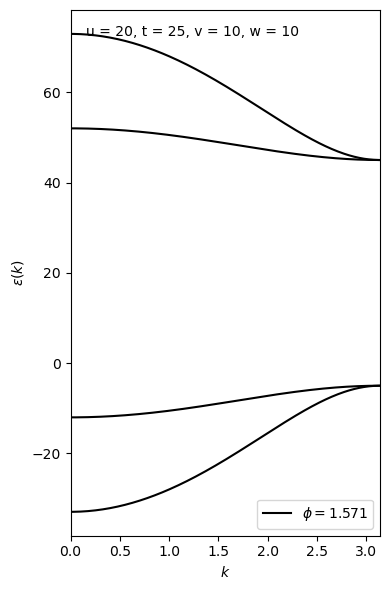

In [1]:
import kwant
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
#from src.ladder_hamiltonian import old_hamiltonian as hamiltonian
from src.ladder_hamiltonian import hamiltonian as hamiltonian

N_phi = 2
phi = np.pi/N_phi

# Some default parameters
u0 = 20
t0 = 25
v0 = 10
w0 = 10

# k point grid
a = 1
kpts = np.linspace(-np.pi/a, np.pi/a, 501)

# Set up figure
fig, ax = plt.subplots(figsize = (4,6))

sys = hamiltonian(phi = phi, n_phi = N_phi, output=True).finalized()
bands = kwant.physics.Bands(sys)
energies = [bands(k*a) for k in kpts]

ax.plot(kpts, energies, color='k',
        label=r'$\phi = $'  + str(np.round(phi, 3)))
    
# Axis limits, labels
ax.set_xlim(0,np.pi/a)
ax.set_ylabel(r'$\epsilon(k)$')
ax.set_xlabel(r'$k$')
ax.annotate(r'u = {}, t = {}, v = {}, w = {}'
            .format(np.round(u0,3),np.round(t0,3),np.round(v0,3), np.round(w0,3)), 
            xy = (0.05, 0.95), 
            xycoords = 'axes fraction')

# Remove duplicate legend handles
handles, labels = ax.get_legend_handles_labels()
unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
ax.legend(*zip(*unique), loc='lower right')
   
plt.tight_layout()
plt.savefig('bands-vs-phi.png', dpi=400)
plt.show()